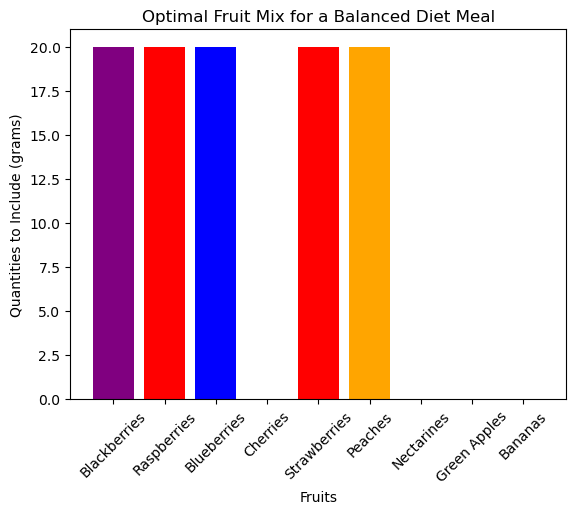

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Nutritional data for each fruit (per 100g)
calories = np.array([43, 52, 57, 50, 32, 39, 44, 52, 89])  # Calories
fiber = np.array([5.3, 6.5, 2.4, 2.1, 2.0, 1.5, 1.7, 2.4, 2.6])  # Fiber content
antioxidants = np.array([2048, 1220, 2400, 820, 1540, 800, 750, 500, 300])  # Antioxidant levels

# Adjusted daily intake constraints
max_calories = 50  # Caloric intake for the fruits alone
total_weight = 1  # Total weight of fruits in 100g

# Objective function to maximize fiber and antioxidants while minimizing calories
def objective(x):
    return -np.dot(fiber, x) - np.dot(antioxidants, x) * 0.01 + np.dot(calories, x) * 0.1

# Constraints: total calories and weight constraints
cons = ({'type': 'ineq', 'fun': lambda x: max_calories - np.dot(calories, x)},
        {'type': 'eq', 'fun': lambda x: total_weight - np.sum(x)},
        {'type': 'ineq', 'fun': lambda x: x})

# Bounds for each variable (cannot buy negative amounts of fruit, max 20g of each to avoid excessive consumption)
bounds = [(0, 0.2) for _ in calories]  # Max 20g of each fruit

# Initial guess (start with equal portions)
init = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

# Run optimization
result = minimize(objective, init, method='SLSQP', bounds=bounds, constraints=cons)

# Prepare the plot
fig, ax = plt.subplots()
fruits = ['Blackberries', 'Raspberries', 'Blueberries', 'Cherries', 'Strawberries', 'Peaches', 'Nectarines', 'Green Apples', 'Bananas']
colors = ['purple', 'red', 'blue', 'red', 'red', 'orange', 'orange', 'green', 'yellow']
quantities = result.x * 100  # Convert to grams for plotting
x_pos = np.arange(len(fruits))

# Creating the bar chart
ax.bar(x_pos, quantities, color=colors)
ax.set_xlabel('Fruits')
ax.set_ylabel('Quantities to Include (grams)')
ax.set_title('Optimal Fruit Mix for a Balanced Diet Meal')
ax.set_xticks(x_pos)
ax.set_xticklabels(fruits, rotation=45)

# Show the plot
plt.show()
